# Meanshift聚类算法


流程
初始化：以每个数据点作为初始的漂移中心。
计算漂移向量：对于每个漂移中心，计算其邻域内所有数据点的加权均值，得到漂移向量。
更新漂移中心：将漂移中心沿着漂移向量移动到新的位置。
重复步骤 2 和 3：直到漂移中心不再发生明显变化。
合并相近的漂移中心：将距离小于某个阈值的漂移中心合并为一个簇中心。

[[ 0.92672674  4.37745014]
 [ 1.96285366  0.82152665]
 [-1.6451587   2.92565238]]
[0 1 2]


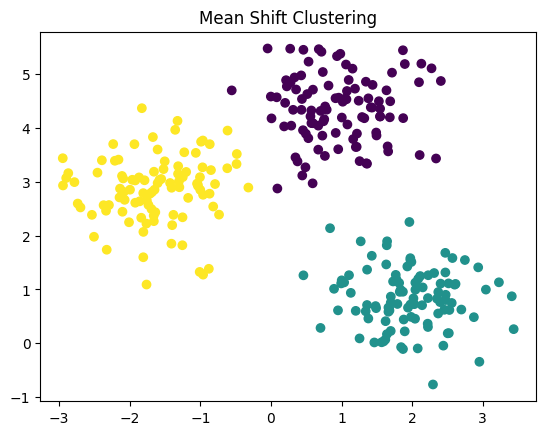

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# 生成示例数据
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# 创建Mean Shift模型
ms = MeanShift()

# 训练模型
ms.fit(X)

# 获取聚类标签
labels = ms.labels_
print(ms.cluster_centers_)
print(np.unique(labels))
# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


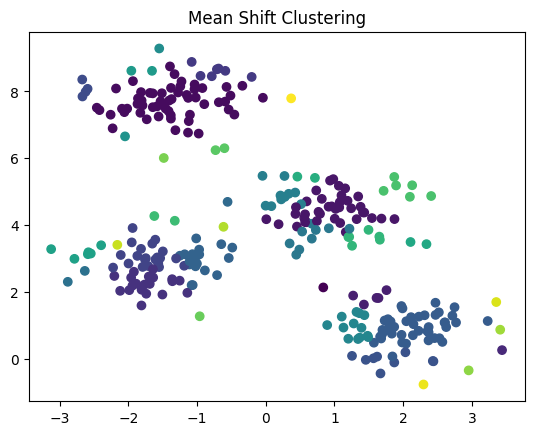

In [12]:
# 手动实现

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 生成示例数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

def mean_shift(X, bandwidth=0.5, max_iterations=100):
    shifted_points = X.copy()
    for _ in range(max_iterations):
        new_shifted_points = []
        for point in shifted_points:
            # 计算邻域内的点
            neighbors = [p for p in X if euclidean_distance(p, point) <= bandwidth]
            if len(neighbors) == 0:
                new_shifted_points.append(point)
            else:
                # 计算均值漂移向量
                new_point = np.mean(neighbors, axis=0)
                new_shifted_points.append(new_point)
        new_shifted_points = np.array(new_shifted_points)
        # 判断是否收敛
        if np.allclose(shifted_points, new_shifted_points):
            break
        shifted_points = new_shifted_points

    # 合并相近的点
    labels = []
    centers = []
    for point in shifted_points:
        found = False
        for i, center in enumerate(centers):
            if euclidean_distance(point, center) <= bandwidth:
                labels.append(i)
                found = True
                break
        if not found:
            centers.append(point)
            labels.append(len(centers) - 1)
    return np.array(labels)

# 运行 Mean Shift 算法
labels = mean_shift(X)
print(np.unique(labels))
# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.show()